In [1]:
from graph import Graph

import time
import random
import matplotlib.pyplot as plt

Алгоритмы Форда-Фалкерсона и Эдмондса–Карпа

In [2]:
# Таблица смежности графа
table = [
    [0, 18, 13, 0,  7, 0],
    [0, 0,  10, 12, 0, 0],
    [0, 0,  0,  0,  19, 0],
    [0, 4,  9,  0,  0, 20],
    [0, 0,  8,  7,  0, 4],
    [0, 0,  0,  0,  0, 0]
]
# Создаём граф (debug=True - рисование решения)
graph = Graph(table, debug=False)
# graph.draw()

print("Алгоритм Форда-Фалкерсона")
print("Максимальный поток:", graph.FordFulkerson(0, 5))
print("Алгоритм Эдмондса–Карпа")
print("Максимальный поток :", graph.EdmondsKarp(0, 5))

Алгоритм Форда-Фалкерсона
Максимальный поток: 23
Алгоритм Эдмондса–Карпа
Максимальный поток : 23


График времени выполнения алгоритмов на случайных данных

- Количество вершин берётся так:
vertices

- Количество повторений (для усреднения)
repeats

100.0%

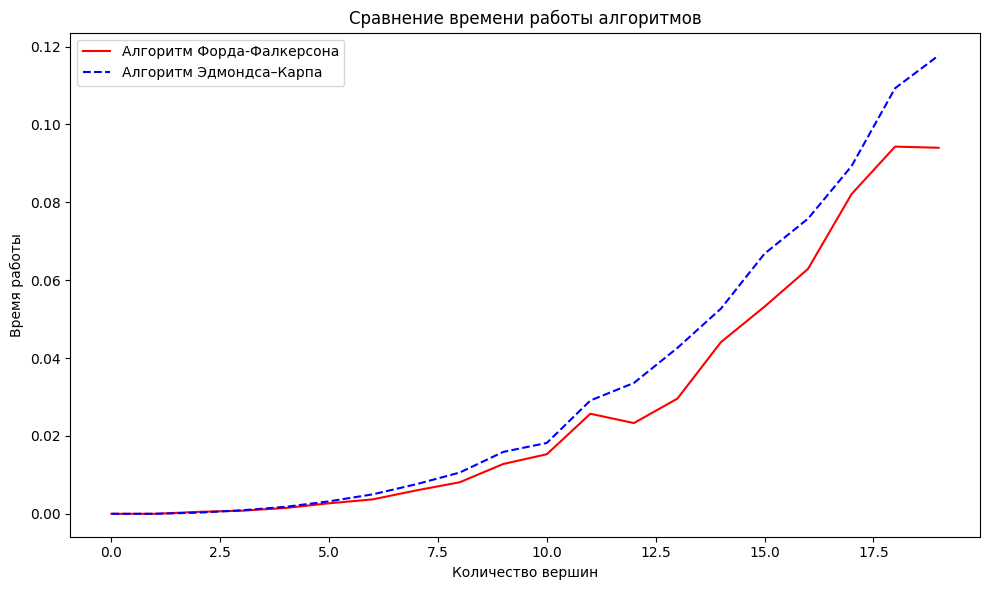

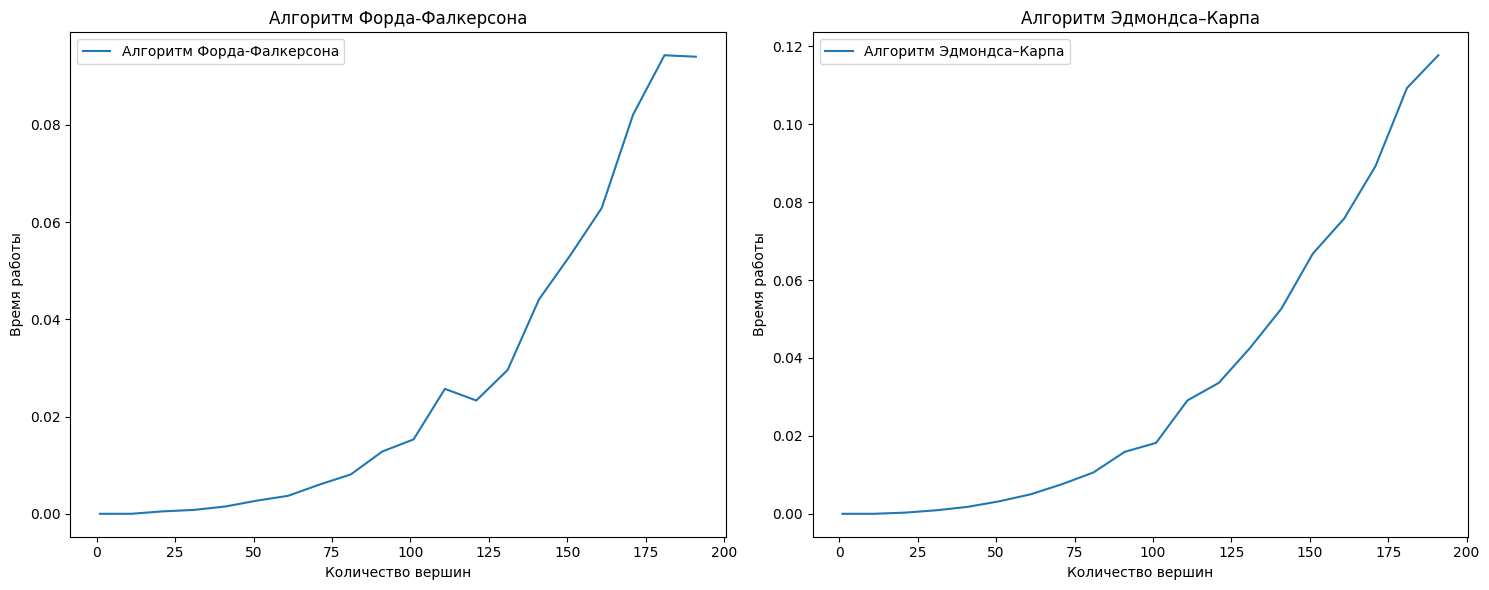

In [4]:
vertices = range(1, 200, 10)
repeats = 10

# Генератор таблиц смежности
def generate(size: int):
    return [[random.randint(1, 10) for _ in range(size)] for _ in range(size)]

# Отображение процесса подсчёта
step_work = len(vertices) / 100
step_percent = 1 / step_work
work, percent = step_work, step_percent

time_data_FF = []
time_data_EK = []
for size in vertices:
    time_result_FF = 0
    time_result_EK = 0
    
    # repeats раз производим рассчёты
    for _ in range(repeats):
        g = Graph(generate(size))
        
        time_start_FF = time.time()
        g.FordFulkerson(0, size - 1)
        time_finish_FF = time.time()
        time_result_FF += time_finish_FF - time_start_FF
        
        time_start_EK = time.time()
        g.EdmondsKarp(0, size - 1)
        time_finish_EK = time.time()
        time_result_EK += time_finish_EK - time_start_EK
        
    time_data_FF.append(time_result_FF / repeats)
    time_data_EK.append(time_result_EK / repeats)
    
    # Отображение процесса подсчёта
    if size > work:
        print('\r\r\r\r\r\r\r', round(percent, 2), '%', sep='', end='')
        work += step_work
        percent += step_percent
    
    
# vertices = list(vertices)
 
# Создаем один общий график
fig, ax = plt.subplots(figsize=(10, 6))

# Создаем массивы для хранения значений x и y
x_values = []
FF_values = []
EK_values = []

# Проходим по всем значениям вершин
for i in range(len(vertices)):
    # Добавляем значение вершины в x_values
    x_values.append(i)
    
    # Добавляем соответствующие значения времени в FF_values и EK_values
    FF_values.append(time_data_FF[i])
    EK_values.append(time_data_EK[i])

# Создаем график
ax.plot(x_values, FF_values, color='red', label='Алгоритм Форда-Фалкерсона')
ax.plot(x_values, EK_values, color='blue', linestyle='--', label='Алгоритм Эдмондса–Карпа')

# Добавляем легенду и заголовки
ax.legend()
ax.set_xlabel('Количество вершин')
ax.set_ylabel('Время работы')
ax.set_title('Сравнение времени работы алгоритмов')

# Отображаем график
plt.tight_layout()
plt.show()

# Создаем два отдельных графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График для алгоритм Форда-Фалкерсона
ax1.plot(vertices, time_data_FF, label='Алгоритм Форда-Фалкерсона')
ax1.set_xlabel('Количество вершин')
ax1.set_ylabel('Время работы')
ax1.set_title('Алгоритм Форда-Фалкерсона')
ax1.legend()

# График для алгоритма Эдмондса–Карпа
ax2.plot(vertices, time_data_EK, label='Алгоритм Эдмондса–Карпа')
ax2.set_xlabel('Количество вершин')
ax2.set_ylabel('Время работы')
ax2.set_title('Алгоритм Эдмондса–Карпа')
ax2.legend()

# Отображаем графики
plt.tight_layout()
plt.show()